In [98]:
# Some experiments with accessing the metascouter API. This file will be deleted once it fulfills its purpose.
import requests
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import pandas
import os
import json

In [190]:
pwd = os.getenv('METASCOUTER_PWD')
request = requests.post('https://api.metascouter.gg/auth/obtain-token/',
                        json={'username': 'Cyan', 'password': pwd})
if request.status_code == 200:
    token = request.json()['token']

In [144]:
def api_request(url):
    jwt_auth = {'Authorization': 'JWT ' + token}
    request = requests.get('https://api.metascouter.gg/ssbu/' + url, headers=jwt_auth)
    if request.status_code != 200:
        print('There was an error with the api_request.')
        print(request)
        return None
    return request.json()

In [191]:
tournaments = api_request('tournaments?limit=80')['results']
tournaments

[{'id': 157,
  'name': 'CEO Dreamland',
  'number': '2020',
  'location': 'Orlando, FL',
  'smashgg_slug': None,
  'date': '2020-03-23'},
 {'id': 155,
  'name': 'Gin analysis games',
  'number': '1',
  'location': 'Berlin, Germany',
  'smashgg_slug': None,
  'date': '2020-03-17'},
 {'id': 154,
  'name': 'Brexit Summit',
  'number': '29',
  'location': 'Berlin, Germany',
  'smashgg_slug': None,
  'date': '2020-03-17'},
 {'id': 153,
  'name': "Smashlan'd",
  'number': '106',
  'location': 'Hilliard, OH',
  'smashgg_slug': None,
  'date': '2020-03-05'},
 {'id': 152,
  'name': 'Test',
  'number': '333',
  'location': 'Test location',
  'smashgg_slug': None,
  'date': '2020-03-05'},
 {'id': 151,
  'name': 'WTS Doubles',
  'number': '2',
  'location': 'WCTA',
  'smashgg_slug': None,
  'date': '2020-03-02'},
 {'id': 150,
  'name': 'Barfights',
  'number': 'PAX East',
  'location': 'Boston, MA',
  'smashgg_slug': None,
  'date': '2020-02-29'},
 {'id': 149,
  'name': "Smashlan'd",
  'number': '

In [192]:
pgru_s_a_tiers = {'Super Smash Con', 'Smash Ultimate Summit', 'The Big House', 'Genesis', 'EVO',
                  'Get On My Level', 'Evolution Japan', '2GG',
                  'Shine', 'Ultimate Summit', 'Umebura', 'Pound', "Let's Make Big Moves",
                  'Frostbite', 'Dreamhack Atlanta', 'Glitch', 'Mainstage', 'Thunder Smash'}
pgru_s_a_ids = {tournament['id']: tournament['name'] + ' ' + tournament['number'] for tournament in tournaments if tournament['name'] in pgru_s_a_tiers}
pgru_s_a_ids

{147: 'Frostbite 2020',
 97: 'Evolution Japan 2020',
 96: 'Genesis 7',
 94: 'Thunder Smash 3',
 89: 'Dreamhack Atlanta 2019',
 85: "Let's Make Big Moves 1",
 84: 'Glitch 8',
 61: 'Ultimate Summit 2',
 60: 'EVO 2019',
 59: 'Super Smash Con 2019',
 52: 'The Big House 9',
 18: 'Mainstage 1',
 15: 'Shine 2019',
 14: 'Get On My Level 2019',
 12: 'Umebura SP3',
 11: 'Umebura SP4',
 9: 'Pound 2019',
 8: '2GG Prime Saga',
 6: 'Smash Ultimate Summit 1',
 4: 'Frostbite 2019',
 3: 'Genesis 6'}

In [147]:
sets = []
for i, tid in enumerate(pgru_s_a_ids.keys()):
    print('Pulling tournament', i)
    tournament = api_request('tournaments/' + str(tid))
    if tournament:
        sets.extend([t_set for t_set in tournament['sets']])
print(len(sets))

Pulling tournament 0
Pulling tournament 1
Pulling tournament 2
Pulling tournament 3
Pulling tournament 4
Pulling tournament 5
Pulling tournament 6
Pulling tournament 7
There was an error with the api_request.
<Response [503]>
Pulling tournament 8
Pulling tournament 9
Pulling tournament 10
Pulling tournament 11
Pulling tournament 12
Pulling tournament 13
Pulling tournament 14
Pulling tournament 15
Pulling tournament 16
Pulling tournament 17
Pulling tournament 18
Pulling tournament 19
Pulling tournament 20
268


In [279]:
matches = []
def death_at_zero(match):
    for data in match['stats']['event_data']:
        for death in data['health_at_death_data']:
            if death[1] == 0:
                return True
    return False

def match_tag(match):
    return 'Match %d of set %d' % (match['index_in_set'], match['set'])

for t_set in sets:
    for match in t_set['matches']:
        tag = match_tag(match) + ':'

        if len(match['stats']['event_data'][0]['stock_data']) < 3 and len(match['stats']['event_data'][1]['stock_data']) < 3:
            print(tag, 'neither player has 3 stock events')

        elif len(match['stats']['event_data'][0]['stock_data']) > 3 or len(match['stats']['event_data'][1]['stock_data']) > 3:
            print(tag, 'player has more than 3 stock events')

        elif death_at_zero(match):
            print(tag, 'death at 0 percent')
        else:
            matches.append(match)
    
print(len(matches))

Match 3 of set 692: neither player has 3 stock events
Match 3 of set 691: neither player has 3 stock events
Match 5 of set 622: player has more than 3 stock events
Match 1 of set 624: death at 0 percent
Match 2 of set 621: player has more than 3 stock events
Match 3 of set 621: player has more than 3 stock events
Match 4 of set 621: player has more than 3 stock events
Match 2 of set 329: neither player has 3 stock events
Match 2 of set 242: neither player has 3 stock events
Match 3 of set 159: death at 0 percent
Match 2 of set 138: death at 0 percent
Match 3 of set 138: death at 0 percent
Match 4 of set 138: death at 0 percent
Match 5 of set 138: death at 0 percent
Match 2 of set 131: death at 0 percent
Match 3 of set 127: death at 0 percent
Match 2 of set 123: death at 0 percent
Match 4 of set 103: death at 0 percent
Match 3 of set 106: death at 0 percent
Match 3 of set 97: death at 0 percent
Match 1 of set 66: death at 0 percent
Match 2 of set 15: death at 0 percent
Match 1 of set 7:

In [225]:
matches_flat = {}
for i, t_set in enumerate(sets):
    if i % 20 == 0:   
        print('Retrieving set', i)
    matches_flat[t_set['id']] = []
    for match in api_request('sets/' + str(t_set['id']) + '/matches/')['results']:
        tag = match_tag(match) + ':'
        if not match['winner']:
            print(tag, 'no winner specified')
        else:
            matches_flat[t_set['id']].append(match)
# print(json.dumps(api_request('sets/919/matches/')['results'][0], indent=4))

Retrieving set 0
Retrieving set 20
Retrieving set 40
Retrieving set 60
Retrieving set 80
Retrieving set 100
Retrieving set 120
Retrieving set 140
Retrieving set 160
Match 1 of set 140: no winner specified
Retrieving set 180
Match 3 of set 100: no winner specified
Retrieving set 200
Retrieving set 220
Retrieving set 240
Retrieving set 260


In [ ]:
copy = dict(matches_flat)
for set_id in copy.keys():
    for match in copy[set_id]:
        tag = match_tag(match) + ':'
        if not match['winner']:
            print(tag, 'no winner specified')
            matches_flat[set_id].remove(match)

In [181]:
print(json.dumps(api_request('matches/93eea6f9-79ae-4708-846e-fd537f64e78d/'), indent=4))

{
    "id": 5386,
    "set": {
        "id": 927,
        "active": true,
        "bracket": "gf2",
        "bracket_full": "Grand Finals (Reset)",
        "index": 1,
        "prev_match_id": null,
        "next_match_id": "608c3ec5-b396-4beb-9791-ab966f50f394",
        "state": "CP",
        "wins": {
            "039c9cec-ecec-49a8-a9f4-1a462314431e": 3,
            "bc8593e8-671e-4750-a1dc-2d1922990f71": 0
        }
    },
    "winner": "039c9cec-ecec-49a8-a9f4-1a462314431e",
    "tournament": 147,
    "index_in_set": 1,
    "time": "2020-02-24T18:29:11.890832Z",
    "active": true,
    "archived": false,
    "verified": false,
    "stage": {
        "id": 231,
        "name": "Pokemon Stadium 2",
        "internal_name": "pokemon_stadium_2",
        "form": "NO"
    },
    "stats": {
        "stats_data": {
            "took_first_stock": {
                "bc8593e8-671e-4750-a1dc-2d1922990f71": true,
                "039c9cec-ecec-49a8-a9f4-1a462314431e": false
            },
   

In [257]:
winning_damage = []
losing_damage = []

winning_deaths = []
losing_deaths = []

for match in matches:
    for deaths in match['stock_stats'].values():
        total_damage = sum([data['damage_dealt'] for data in deaths.values()])
        if '1' in deaths and 'death_percent' in deaths['1']:
            losing_damage.append(total_damage)
            losing_deaths.extend([data['death_percent'] for data in deaths.values()])
        else:
            winning_damage.append(total_damage)
            winning_deaths.extend([data['death_percent'] for data in deaths.values() if 'death_percent' in data])
print(len(winning_damage))

953
2859


In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

Mean: 400.42077649527806
Standard deviation: 56.67260469024799


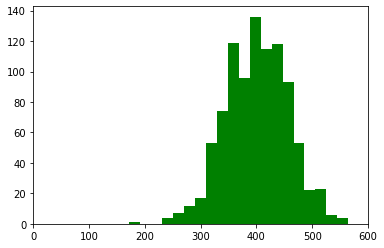

In [240]:
fig, ax = plt.subplots()
ax.set_xlim(0, 600)
ax.hist(winning_damage, bins=20, color='green')
ax.plot()
print('Mean:', np.mean(winning_damage))
print('Standard deviation:', np.std(winning_damage))

Mean: 306.30954879328436
Standard deviation: 82.04977428191053


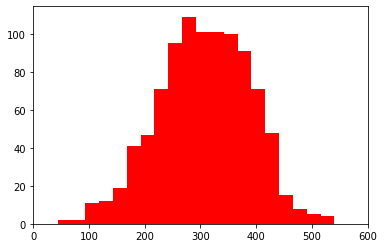

In [241]:
fig, ax = plt.subplots()
ax.set_xlim(0, 600)
ax.hist(losing_damage, bins=20, color='red')
ax.plot()
print('Mean:', np.mean(losing_damage))
print('Standard deviation:', np.std(losing_damage))

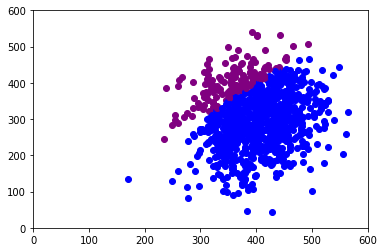

In [242]:
fig, ax = plt.subplots()
ax.set_xlim(0, 600)
ax.set_ylim(0, 600)

for w, l in zip(winning_damage, losing_damage):
    color = 'blue' if w >= l else 'purple'
    plt.scatter(w, l, color=color)
plt.show()
# plt.scatter(winning_damage, losing_damage)

In [245]:
dmg_inversion = [w < l for w, l in zip(winning_damage, losing_damage)]
proportion = np.mean(dmg_inversion)
margin = 1.96 * math.sqrt(proportion * (1 - proportion) / len(dmg_inversion))
print('Proportion of damage inversions (winner took more damage): ', proportion, '+-', margin)

Proportion of damage inversions (winner took more damage):  0.15634837355718784 +- 0.02305886246591056


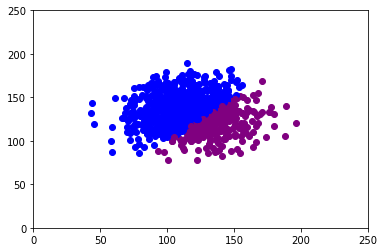

In [15]:
fig, ax = plt.subplots()
ax.set_xlim(0, 250)
ax.set_ylim(0, 250)

for w_dps, l_dps in zip(winning_dps, losing_dps):
    color = 'blue' if w_dps <= l_dps else 'purple'
    plt.scatter(w_dps, l_dps, color=color)
plt.show()
# plt.scatter(winning_dps, losing_dps)
    

In [272]:
print(json.dumps(matches_flat[32][2], indent=4))

{
    "active": true,
    "unrecoverable": false,
    "archived": false,
    "time": "2019-02-25T03:22:11.553441Z",
    "health_events_stats": [
        {
            "id": 25394,
            "player_number": 1,
            "time": 0.07,
            "health": 0
        },
        {
            "id": 25395,
            "player_number": 2,
            "time": 0.07,
            "health": 0
        },
        {
            "id": 25396,
            "player_number": 2,
            "time": 1.63,
            "health": 2
        },
        {
            "id": 25397,
            "player_number": 2,
            "time": 2.38,
            "health": 6
        },
        {
            "id": 25398,
            "player_number": 2,
            "time": 2.7,
            "health": 10
        },
        {
            "id": 25399,
            "player_number": 2,
            "time": 4.08,
            "health": 11
        },
        {
            "id": 25400,
            "player_number": 2,
            "time":

In [246]:
first_stock_wins = []
for t_set in matches_flat.values():
    for match in t_set:
        first_blood = 3 - match['stock_events_stats'][2]['player_number']
#         print(match['winner'])
        first_stock_wins.append(match['player' + str(first_blood)]['id'] == match['winner']['id'])
proportion = np.mean(first_stock_wins)
margin = 1.96 * math.sqrt(proportion * (1 - proportion) / len(first_stock_wins))
print('Proportion of games where the taker of the first stock wins the match:', proportion, '+-', margin)

987
Proportion of games where the taker of the first stock wins the match: 0.6919959473150963 +- 0.02880232098244183


No handles with labels found to put in legend.


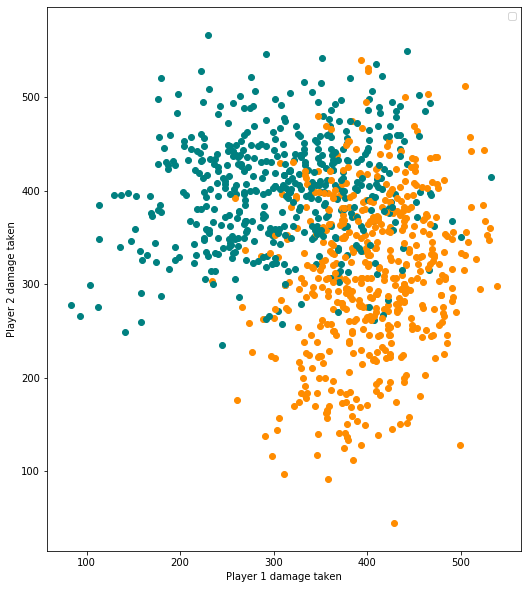

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

for match in matches:
    p1, p2 = match['players'].keys()
    p1_dmg = match['stats']['stats_data']['damage_taken'][p1]
    p2_dmg = match['stats']['stats_data']['damage_taken'][p2]
    color = 'teal' if p1 == match['winner'] else 'darkorange'
    ax.scatter(p1_dmg, p2_dmg, color=color)
    
ax.set_xlabel('Player 1 damage taken')
ax.set_ylabel('Player 2 damage taken')
ax.set_aspect(1)

plt.show()

[0, 644, 287, 22]
Matches by stock difference:


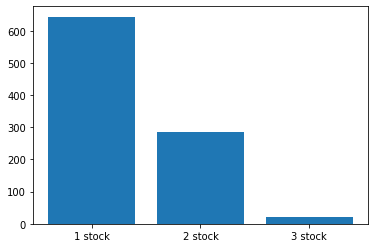

In [251]:
stock_diffs = [0, 0, 0, 0]
for match in matches:
    stock_diffs[sum(match['stats']['ending_player_stocks'].values())] += 1
print(stock_diffs)
plt.bar(['1 stock', '2 stock', '3 stock'], stock_diffs[1:]) 
print('Matches by stock difference:')

Mean: 141.47047619047618
Standard deviation: 29.77667540518822


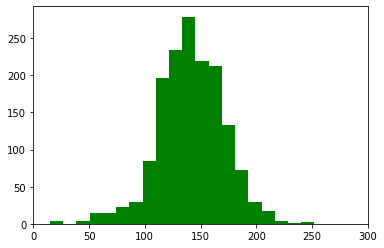

In [259]:
fig, ax = plt.subplots()
ax.set_xlim(0, 300)
ax.hist(winning_deaths, bins=20, color='green')
ax.plot()
print('Mean:', np.mean(winning_deaths))
print('Standard deviation:', np.std(winning_deaths))
# print(winning_avg_death)

Mean: 134.262679258482
Standard deviation: 29.992220793176333


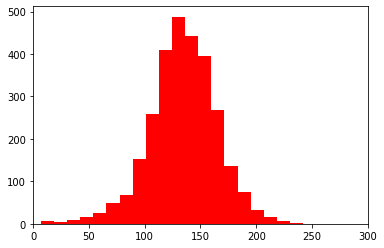

In [260]:
fig, ax = plt.subplots()
ax.set_xlim(0, 300)
ax.hist(losing_deaths, bins=20, color='red')
ax.plot()
print('Mean:', np.mean(losing_deaths))
print('Standard deviation:', np.std(losing_deaths))

['0-3', '0-2', '0-1', '1-0']
[23, 121, 43, 9]
Less than 5% of matches where a player was at a 2 stock deficit ended with that player winning. Interesting!


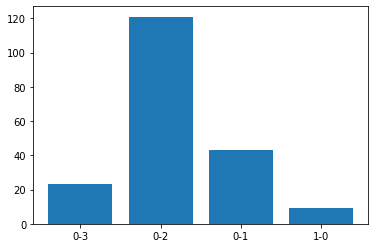

In [20]:
stock_diff = {'0-3': 0, '0-2': 0, '0-1': 0, '1-0': 0}

for match in matches:
    p1_stocks = match['stats']['event_data'][0]['stock_data']
    p2_stocks = match['stats']['event_data'][1]['stock_data']
    if len(p2_stocks) == 0 or len(p1_stocks) > 1 and p1_stocks[1][0] < p2_stocks[0][0]:
        stock_diff[str(3-len(p1_stocks)) + '-' + str(3-len(p2_stocks))] += 1
    elif len(p1_stocks) == 0 or len(p2_stocks) > 1 and p2_stocks[1][0] < p1_stocks[0][0]:
        stock_diff[str(3-len(p2_stocks)) + '-' + str(3-len(p1_stocks))] += 1

print(list(stock_diff.keys()))
print(list(stock_diff.values()))
plt.bar(list(stock_diff.keys()), list(stock_diff.values()))
print('Less than 5% of matches where a player was at a 2 stock deficit ended with that player winning. Interesting!')

[659, 260, 32]
[851, 97, 5]
[0.5635761589403974, 0.27170868347338933, 0.13513513513513514]


<BarContainer object of 3 artists>

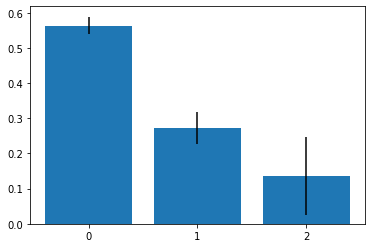

In [282]:
outcomes = [[0, 0], [0, 0], [0, 0], [0, 0]]

for match in matches:
    for data in match['stats']['event_data']:
        num_early_deaths = sum([death[1] <= 100 for death in data['health_at_death_data']])
#         if num_early_deaths == 3:
#             print(match_tag(match))
        outcomes[num_early_deaths][0 if len(data['health_at_death_data']) == 3 else 1] += 1

outcomes = outcomes[:3]
print([o[0] for o in outcomes])
print([o[1] for o in outcomes])
win_rates = [o[1]/(o[1]+o[0]) for o in outcomes]
print(win_rates)
plt.bar(['0', '1', '2'], win_rates, yerr=[1.96*math.sqrt(win_rates[i] * (1 - win_rates[i]) / sum(outcomes[i])) for i in range(3)])


In [380]:
char_colors = {'peach': 'pink', 'olimar': 'bisque', 'joker': 'maroon', 'inkling': 'darkorange',
               'zero_suit_samus': 'deepskyblue', 'palutena': 'limegreen', 'fox': 'goldenrod', 'pikachu': 'yellow',
               'pokemon_trainer': 'tomato', 'mr_game_and_watch': 'black', 'wolf': 'mediumslateblue', 'pac_man': 'yellow',
               'wario': 'gold', 'mario': 'red', 'lucina': 'royalblue', 'pichu': 'yellow', 'snake': 'slategray',
               'rob': 'firebrick', 'rosalina_and_luma': 'turquoise', 'ike': 'mediumblue', 'mega_man': 'dodgerblue'}

olimar 153 {'Myran', 'Dabuz', 'Shuton'}
peach 133 {'Samsora', 'Dabuz'}
joker 128 {'Sharp', 'Tyroy', 'zackray', 'Tsu', 'Nairo', 'MkLeo', 'Alsoda', 'VoiD'}
zero_suit_samus 115 {'Choco', 'Acnologia', 'Marss', 'Nairo', 'Samsora', 'SHKY', 'Salem'}
inkling 97 {'Cosmos', 'Tony Pajamas', 'Abadango', 'Armada', 'ProtoBanham'}
palutena 97 {'Buzzeh', 'Nairo', 'Dabuz', 'Samsora', 'Protege', 'Seagull Joe'}
mario 87 {'zackray', 'Stroder', 'Prodigy', 'Dark Wizzy', 'Ally'}
wario 86 {'Bruh-man', 'Tweek', 'Kameme', 'zackray', 'Glutonny', 'Mang0'}
pokemon_trainer 84 {'Tweek', 'Cojam', 'Puppeh', 'MkLeo', 'Leffen', '2FB'}
wolf 82 {'Cashew', 'Tweek', 'zackray', 'Mew2King', 'Jakal', 'Nairo', 'MkLeo', 'Sandbag', 'ZeRo', 'Ralphie', 'Seagull Joe'}
fox 82 {'Chimera', 'Paseriman', 'ZD', 'Light', 'USA', 'Lui$', 'YoYoGuy', 'Primid'}
lucina 76 {'Vermillion', 'Mr E', 'zackray', 'Nairo', 'MkLeo', 'ProtoBanham'}
pac_man 71 {'Tea', 'Sinji'}
pikachu 58 {'Rokmon', 'ESAM'}
mr_game_and_watch 57 {'LeoN', 'Maister'}
pichu 52 {

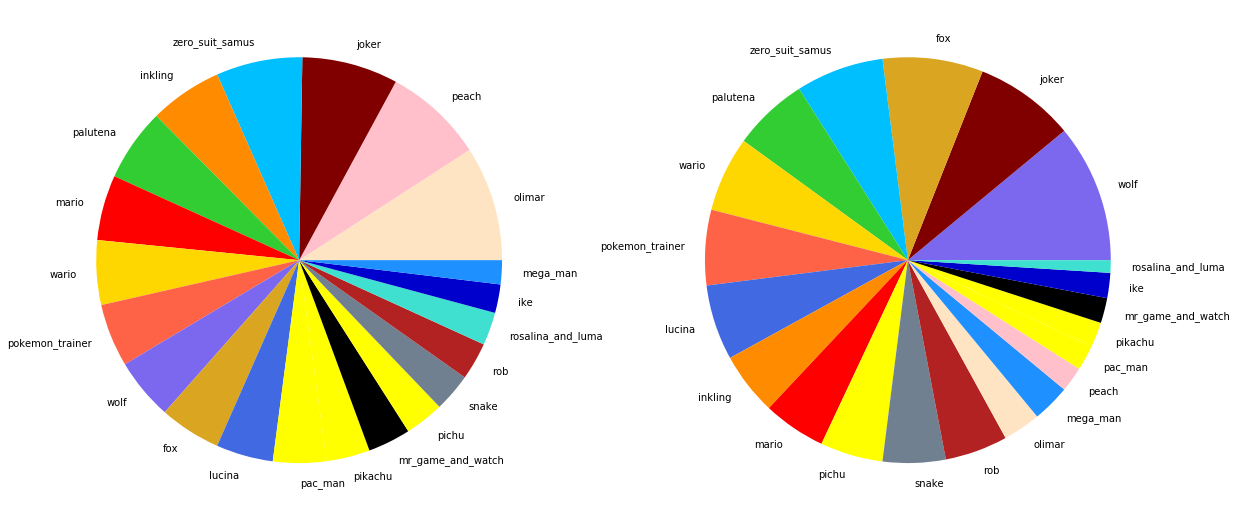

In [400]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
character_freq = {}
character_reps = {}

player_freq = {}

player_char_freq = {}

for match in matches:
    for player_data in match['players'].values():
        char = player_data['character']['internal_name']
        player = player_data['player_tag']
        if char not in character_freq:
            character_freq[char] = 0
            character_reps[char] = set()
        if player not in player_freq:
            player_freq[player] = 0
        if player not in player_char_freq:
            player_char_freq[player] = {}
        if char not in player_char_freq[player]:
            player_char_freq[player][char] = 0
        character_freq[char] += 1
        character_reps[char].add(player)
        player_freq[player] += 1
        player_char_freq[player][char] += 1
    
characters = sorted(filter(lambda key: character_freq[key] >= 30, character_freq.keys()), key=lambda key: -character_freq[key])
players = sorted(filter(lambda key: player_freq[key] >= 30, player_freq.keys()), key=lambda key: -player_freq[key])
player_chars = {}

for player in players:
    player_chars[player] = sorted(filter(lambda key: player_char_freq[player][key] >= 30, player_char_freq[player].keys()), key=lambda key: -player_char_freq[player][key])
    
for char in characters:
    print(char, character_freq[char], character_reps[char])

print(players)
print(player_chars)

ax[0].pie([character_freq[char] for char in characters], labels=characters, colors = [char_colors[char] for char in characters])

characters = sorted(characters, key=lambda key: -len(character_reps[key]))
ax[1].pie([len(character_reps[char]) for char in characters], labels = characters, colors = [char_colors[char] for char in characters])
plt.show()

In [238]:
print(json.dumps(matches[1], indent=4))

{
    "id": 5352,
    "set": 919,
    "winner": "bc8593e8-671e-4750-a1dc-2d1922990f71",
    "tournament": 147,
    "index_in_set": 2,
    "time": "2020-02-24T16:58:14.125740Z",
    "active": true,
    "archived": false,
    "verified": false,
    "stage": {
        "id": 90,
        "name": "Final Destination",
        "internal_name": "final_destination",
        "form": "NO"
    },
    "stats": {
        "event_data": [
            {
                "name": "Player 1 (Maister as Mr. Game & Watch)",
                "port": 1,
                "health_at_death_data": [
                    [
                        60.21666666666667,
                        130
                    ],
                    [
                        115.83333333333333,
                        110
                    ]
                ],
                "health_data": [
                    [
                        0.0,
                        13
                    ],
                    [
                  

In [409]:
characters = sorted(characters, key=lambda x: x)

char_kill_pcts = {char: [] for char in characters}
char_death_pcts = {char: [] for char in characters}

player_kill_pcts = {player: [] for player in players}
player_death_pcts = {player: [] for player in players}

hybrid_kill_pcts = {player: {char: [] for char in player_chars[player]} for player in player_chars.keys()}
hybrid_death_pcts = {player: {char: [] for char in player_chars[player]} for player in player_chars.keys()}

matchups = {char: {char: [] for char in characters} for char in characters}

char_kills = {char: [] for char in characters}
char_deaths = {char: [] for char in characters}

player_kills = {player: [] for player in players}
player_deaths = {player: [] for player in players}

hybrid_kills = {player: {char: [] for char in player_chars[player]} for player in player_chars.keys()}
hybrid_deaths = {player: {char: [] for char in player_chars[player]} for player in player_chars.keys()}

char_damage_dealt = {char: [] for char in characters}
char_damage_taken = {char: [] for char in characters}

player_damage_dealt = {player: [] for player in players}
player_damage_taken = {player: [] for player in players}

hybrid_damage_dealt = {player: {char: [] for char in player_chars[player]} for player in player_chars.keys()}
hybrid_damage_taken = {player: {char: [] for char in player_chars[player]} for player in player_chars.keys()}

for match in matches:
    kill_pcts = [[], []]
    death_pcts = [[], []]
    kills = [0, 0]
    deaths = [0, 0]
    damage_dealt = [0, 0]
    damage_taken = [0, 0]
    player_arr = [None, None]
    character_arr = [None, None] 
    
    for player_data in match['players'].values():
        if player_data['player'] == 1:
            player_arr[0] = player_data['player_tag']
            character_arr[0] = player_data['character']['internal_name']
        else:
            player_arr[1] = player_data['player_tag']
            character_arr[1] = player_data['character']['internal_name']
    
    for i in range(2):
        for stock in match['stock_stats'][str(i+1)].values():
            damage_dealt[i] += stock['damage_dealt']
            damage_taken[1-i] += stock['damage_dealt']
            
            if 'death_percent' in stock:
                death_pcts[i].append(stock['death_percent'])
                kill_pcts[1-i].append(stock['death_percent'])
                deaths[i] += 1
                kills[1-i] += 1
        
    for i in range(2):
        char = character_arr[i]
        player = player_arr[i]
        
        if char in characters:
            char_kill_pcts[char].extend(kill_pcts[i])
            char_death_pcts[char].extend(death_pcts[i])
            char_kills[char].append(kills[i])
            char_deaths[char].append(deaths[i])
            char_damage_dealt[char].append(damage_dealt[i])
            char_damage_taken[char].append(damage_taken[i])
        if player in players:
            player_kill_pcts[player].extend(kill_pcts[i])
            player_death_pcts[player].extend(death_pcts[i])
            player_kills[player].append(kills[i])
            player_deaths[player].append(deaths[i])
            player_damage_dealt[player].append(damage_dealt[i])
            player_damage_taken[player].append(damage_taken[i])
        if player in player_chars and char in player_chars[player]:
            hybrid_kill_pcts[player][char].extend(kill_pcts[i])
            hybrid_death_pcts[player][char].extend(death_pcts[i])
            hybrid_kills[player][char].append(kills[i])
            hybrid_deaths[player][char].append(deaths[i])
            hybrid_damage_dealt[player][char].append(damage_dealt[i])
            hybrid_damage_taken[player][char].append(damage_taken[i])
             
    char1, char2 = character_arr
    if char1 in characters and char2 in characters:
        if deaths[0] == 3:
            matchups[char1][char2].append(0)
            matchups[char2][char1].append(1)
        else:
            matchups[char2][char1].append(0)
            matchups[char1][char2].append(1)

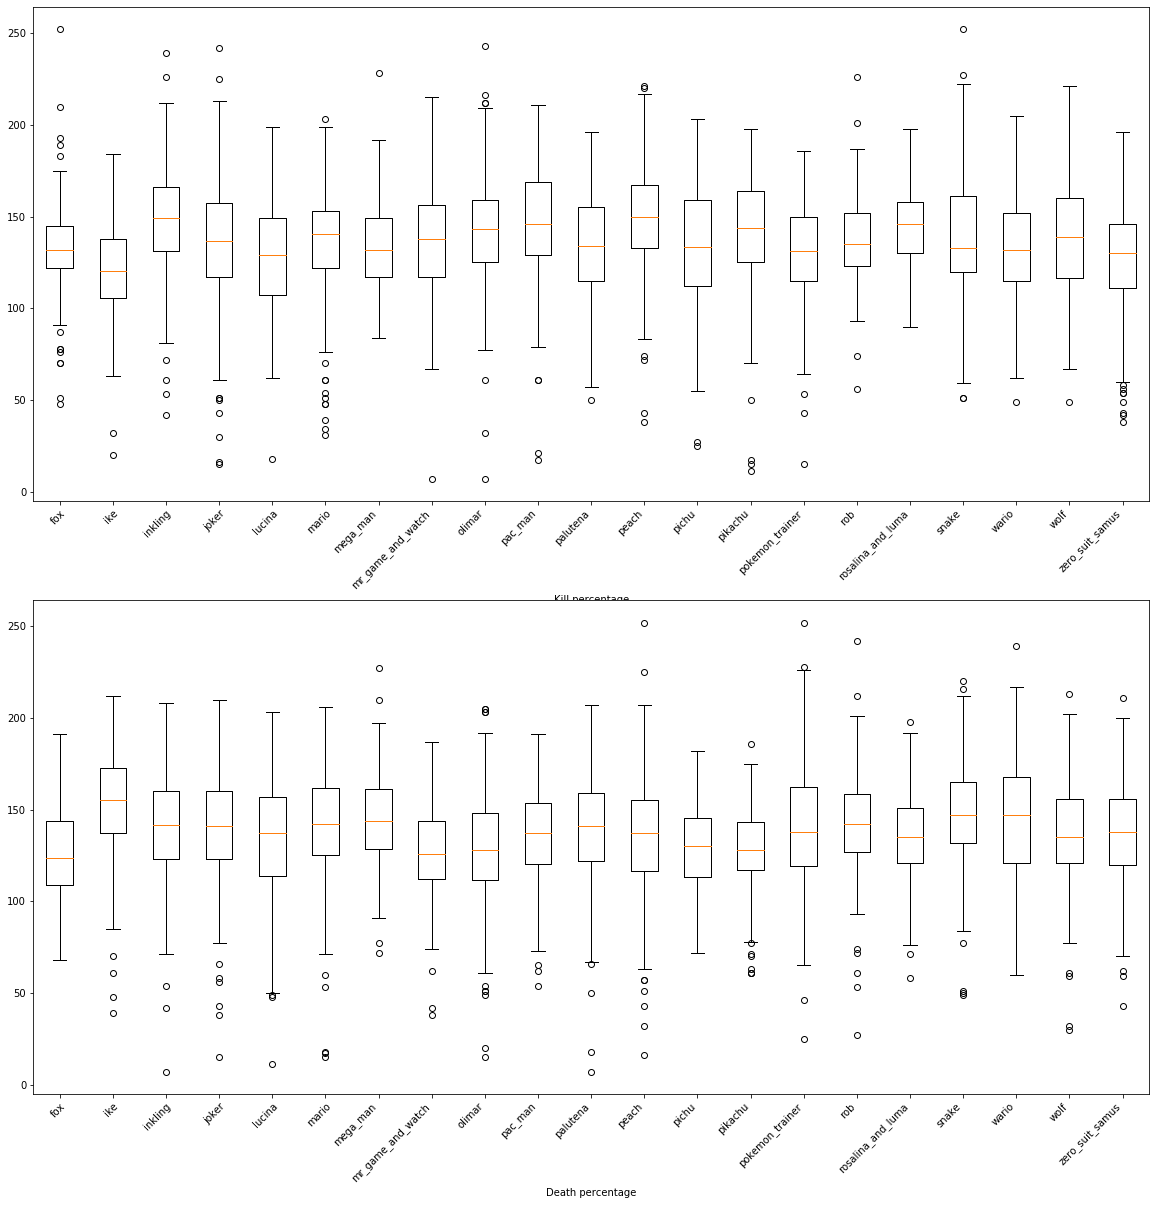

In [411]:
fig, ax = plt.subplots(2, 1, figsize=(20, 20))
pcts = [char_kill_pcts, char_death_pcts]
titles = ['Kill percentage', 'Death percentage']
colors = [char_colors[char] for char in characters]
for i in range(2):
    ax[i].set_xticklabels(labels = characters, rotation=45, rotation_mode='anchor', verticalalignment='top', horizontalalignment='right')
    ax[i].set_xlabel(titles[i])
    plot = ax[i].boxplot(pcts[i].values())
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

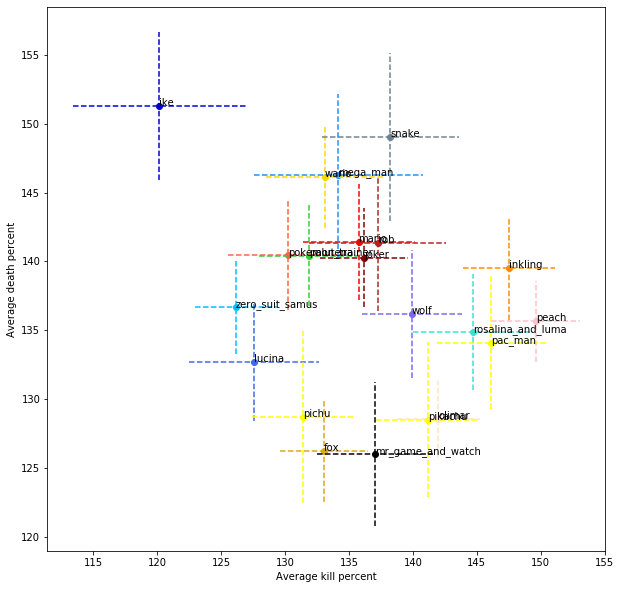

In [417]:
def plot_with_error(x_arr, y_arr, name, color):
    x = np.mean(x_arr)
    y = np.mean(y_arr)
    xerr = 1.96 * np.std(x_arr) / math.sqrt(len(x_arr))
    yerr = 1.96 * np.std(y_arr) / math.sqrt(len(y_arr))
    plt.scatter(x, y, color=color)
    error = plt.errorbar(x, y, xerr, yerr, color=color)
    error[-1][0].set_linestyle('--')
    error[-1][1].set_linestyle('--')
    plt.annotate(name, (x, y))
    
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Average kill percent by character')
ax.set_ylabel('Average death percent by character')
for char in characters:
    plot_with_error(char_kill_pcts[char], char_death_pcts[char], char, char_colors[char])

In [413]:
matchups = {}
for char1 in characters:
    matchups[char1] = {}
    for char2 in characters:
        matchups[char1][char2] = []

for match in matches:
    for player in match['players'].values():
        if player['id'] == match['winner']:
            win_char = player['character']['internal_name']
        else:
            lose_char = player['character']['internal_name']
    
    if win_char in characters and lose_char in characters:
        matchups[win_char][lose_char].append(1)
        matchups[lose_char][win_char].append(0)

print(matchups['rob']['mario'])
mu_arr = np.array([[np.mean(matchups[char1][char2]) for char2 in characters] for char1 in characters])

[0, 0, 0]


/Users/calvin/miniconda3/envs/tf/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/calvin/miniconda3/envs/tf/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


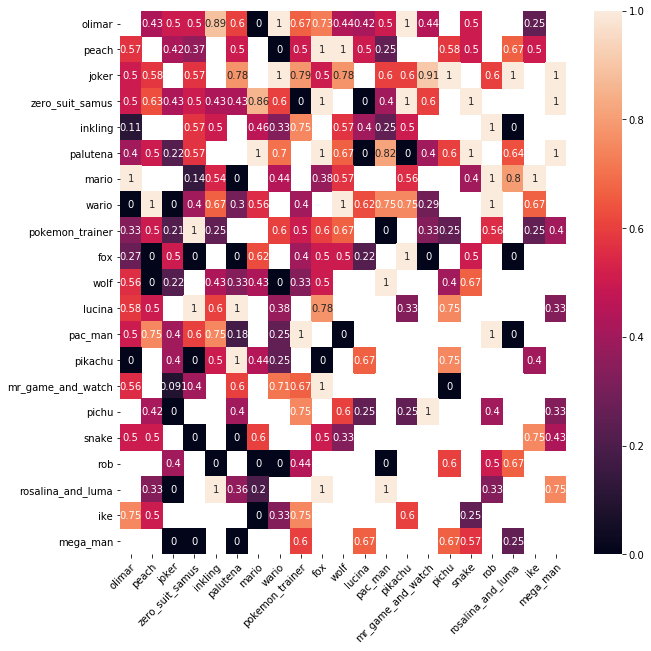

In [414]:
import seaborn as sns
characters = sorted(characters, key=lambda char:-character_freq[char])
mu_arr = np.array([[np.mean(matchups[char1][char2]) for char2 in characters] for char1 in characters])

fig, ax = plt.subplots(figsize=(10, 10))
# ax.imshow(mu_arr)
ax = sns.heatmap(mu_arr, xticklabels = characters, yticklabels = characters, annot=True)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

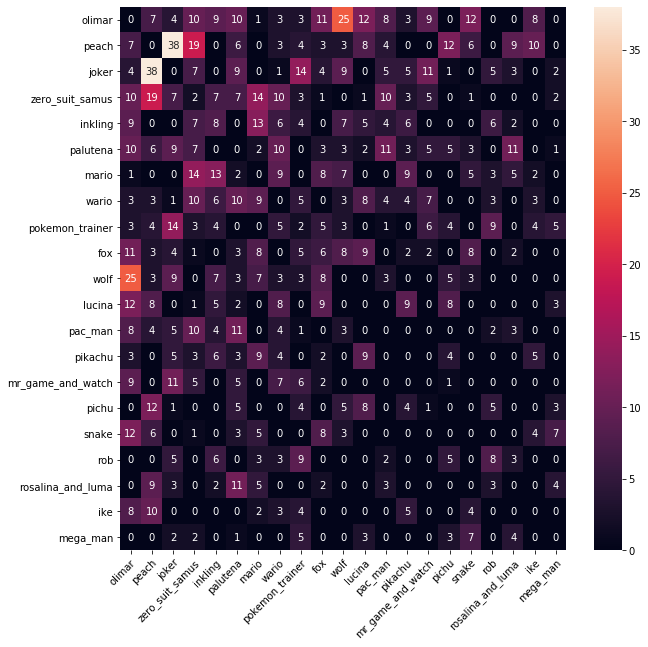

In [415]:
mu_count = np.array([[len(matchups[char1][char2]) for char2 in characters] for char1 in characters])

fig, ax = plt.subplots(figsize=(10, 10))
# ax.imshow(mu_arr)
ax = sns.heatmap(mu_count, xticklabels = characters, yticklabels = characters, annot=True)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

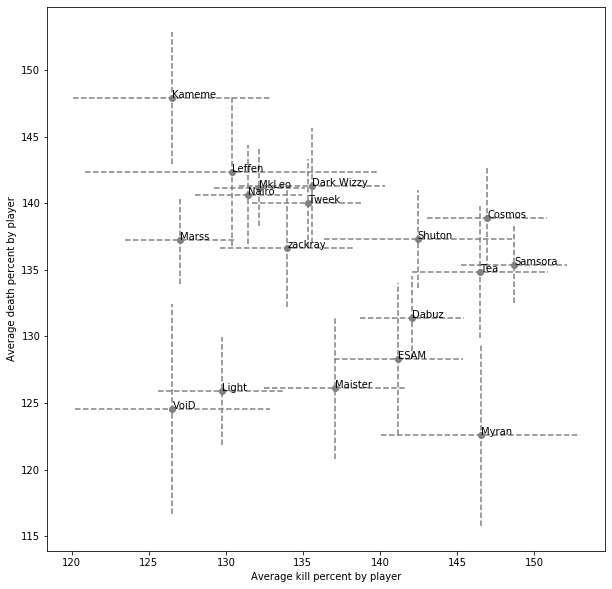

In [427]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Average kill percent by player')
ax.set_ylabel('Average death percent by player')
for player in players:
    plot_with_error(player_kill_pcts[player], player_death_pcts[player], player, 'gray')

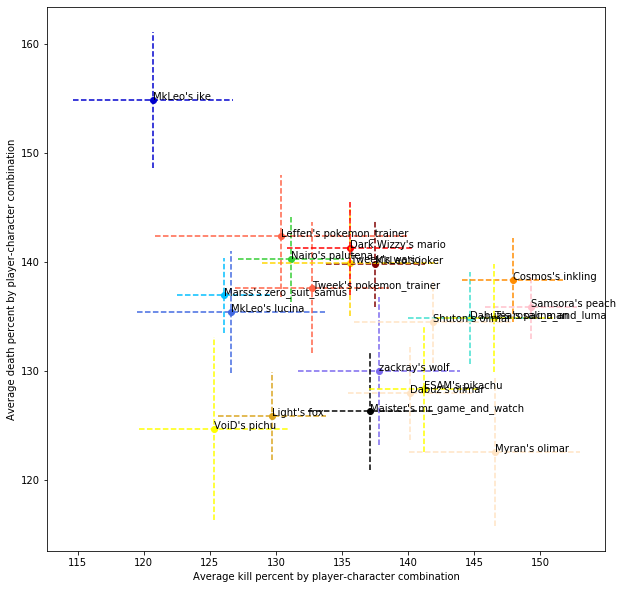

In [423]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Average kill percent by player-character combination')
ax.set_ylabel('Average death percent by player-character combination')
for player in player_chars:
    for char in player_chars[player]:
        plot_with_error(hybrid_kill_pcts[player][char], hybrid_death_pcts[player][char], player+"'s " + char, char_colors[char])

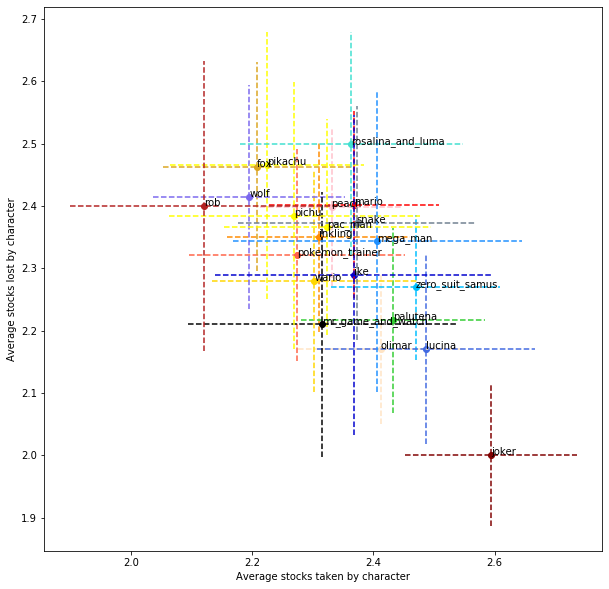

In [424]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Average stocks taken by character')
ax.set_ylabel('Average stocks lost by character')
for char in characters:
    plot_with_error(char_kills[char], char_deaths[char], char, char_colors[char])

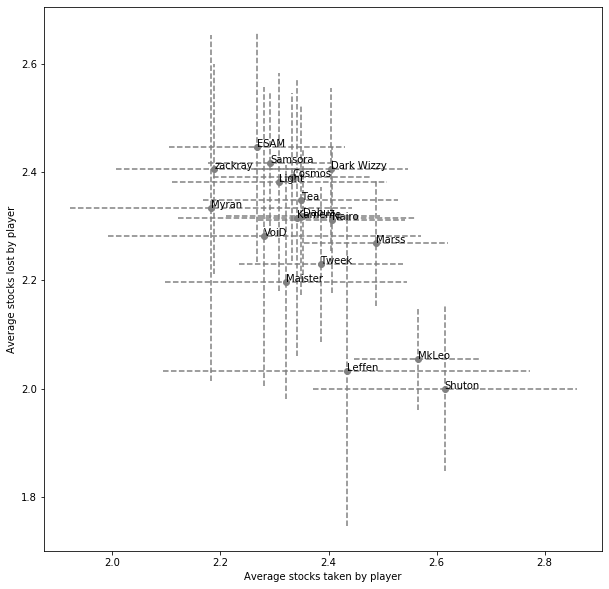

In [431]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Average stocks taken by player')
ax.set_ylabel('Average stocks lost by player')
for player in players:
    plot_with_error(player_kills[player], player_deaths[player], player, 'gray')

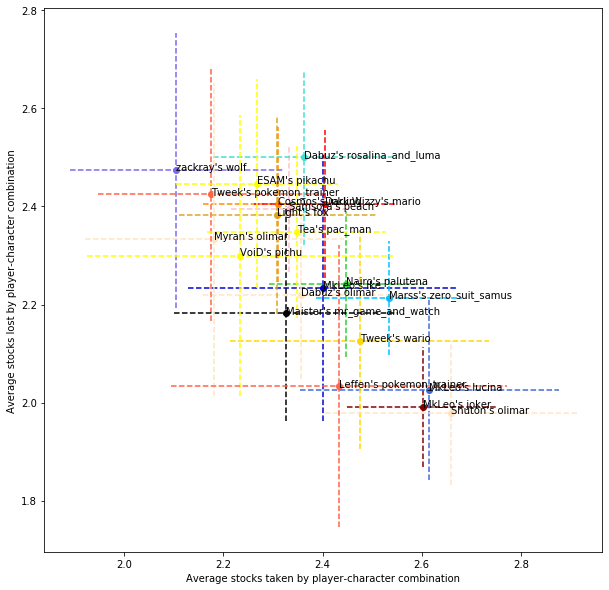

In [429]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Average stocks taken by player-character combination')
ax.set_ylabel('Average stocks lost by player-character combination')
for player in player_chars:
    for char in player_chars[player]:
        plot_with_error(hybrid_kills[player][char], hybrid_deaths[player][char], player+"'s " + char, char_colors[char])

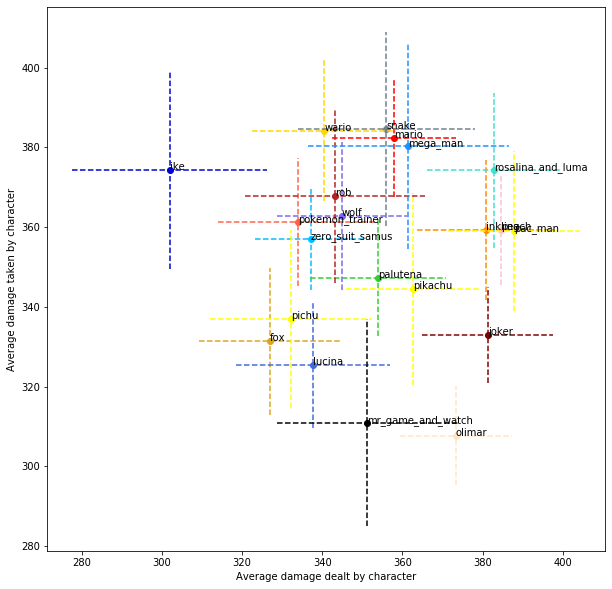

In [430]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Average damage dealt by character')
ax.set_ylabel('Average damage taken by character')
for char in characters:
    plot_with_error(char_damage_dealt[char], char_damage_taken[char], char, char_colors[char])

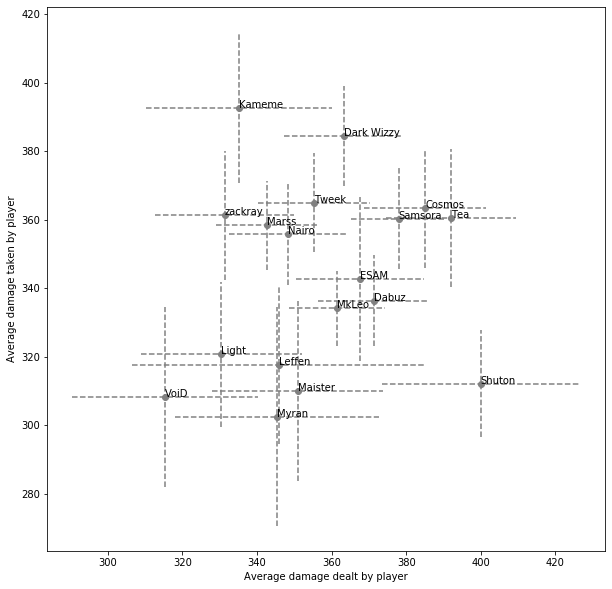

In [432]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Average damage dealt by player')
ax.set_ylabel('Average damage taken by player')
for player in players:
    plot_with_error(player_damage_dealt[player], player_damage_taken[player], player, 'gray')

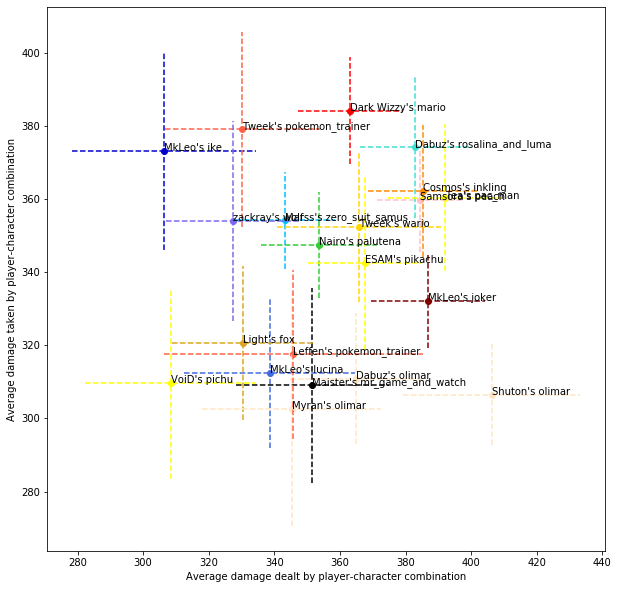

In [433]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('Average damage dealt by player-character combination')
ax.set_ylabel('Average damage taken by player-character combination')
for player in player_chars:
    for char in player_chars[player]:
        plot_with_error(hybrid_damage_dealt[player][char], hybrid_damage_taken[player][char], player+"'s " + char, char_colors[char])

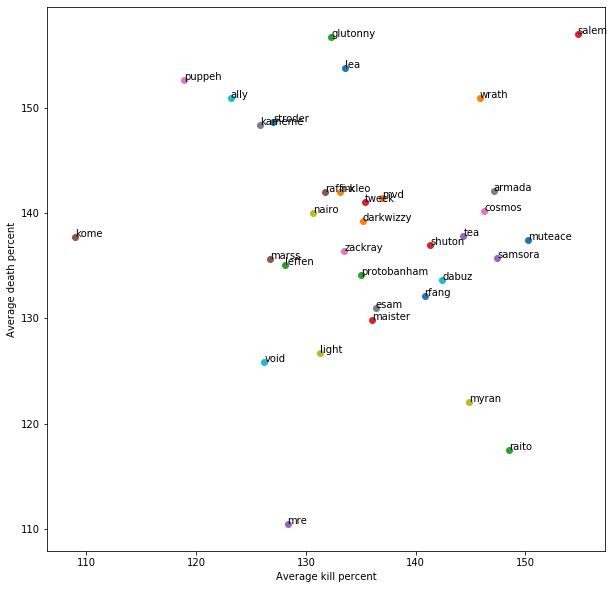

In [129]:
fig, ax = plt.subplots(figsize=(10, 10))
for player in players:
    if len(avg_kill[player]) < 20:
        continue
    x = np.mean(avg_kill[player])
    y = np.mean(avg_death[player])
    ax.scatter(x, y)
    ax.annotate(player, (x, y))
    
ax.set_xlabel('Average kill percent')
ax.set_ylabel('Average death percent')

plt.show()

In [435]:
print(json.dumps(matches_flat[335], indent=4))

[
    {
        "active": true,
        "unrecoverable": false,
        "archived": false,
        "time": "2019-11-11T01:47:29.118486Z",
        "health_events_stats": [
            {
                "id": 169009,
                "player_number": 2,
                "time": 0.05,
                "health": 0
            },
            {
                "id": 169008,
                "player_number": 1,
                "time": 0.05,
                "health": 0
            },
            {
                "id": 169010,
                "player_number": 1,
                "time": 2.62,
                "health": 3
            },
            {
                "id": 169011,
                "player_number": 1,
                "time": 2.77,
                "health": 6
            },
            {
                "id": 169012,
                "player_number": 1,
                "time": 2.92,
                "health": 9
            },
            {
                "id": 169013,
                "pla

In [221]:
match_state = [[[[] for _ in range(11)] for _ in range(3)] for _ in range(3)]

for t_set in matches_flat.keys():
    for match in matches_flat[t_set]:
        damage = [0, 0]
        
    
    p1_event_data, p2_event_data = match['stats']['event_data']
    p1_wins = len(p2_event_data['health_at_death_data']) == 3
    
    p2_idx = 0
    p2_stocks_lost = 0
    for death_num in range(min(2, len(p1_event_data['health_at_death_data']))):
        p1_death_time = p1_event_data['health_at_death_data'][death_num][0]
        health_data = p2_event_data['health_data']
        
        while p2_idx < len(health_data) - 1 and health_data[p2_idx+1][0] < p1_death_time:
            p2_idx += 1
            if health_data[p2_idx][1] == 0:
                p2_stocks_lost += 1
        p2_dmg = health_data[p2_idx][1]
        p2_dmg_binned = min(10, p2_dmg // 20)
        match_state[death_num+1][p2_stocks_lost][p2_dmg_binned].append(p1_wins)
            
    p1_idx = 0
    p1_stocks_lost = 0
    for death_num in range(min(2, len(p2_event_data['health_at_death_data']))):
        p2_death_time = p2_event_data['health_at_death_data'][death_num][0]
        health_data = p1_event_data['health_data']
        
        while p1_idx < len(health_data) - 1 and health_data[p1_idx+1][0] < p2_death_time:
            p1_idx += 1
            if health_data[p1_idx][1] == 0:
                p1_stocks_lost += 1
        p1_dmg = health_data[p1_idx][1]
        p1_dmg_binned = min(10, p1_dmg // 20)
        if p1_stocks_lost == 3:
            break
        match_state[death_num+1][p1_stocks_lost][p1_dmg_binned].append(not p1_wins)

for death_num in range(1, 3):
    for stocks_lost in range(3):
        for dmg_bin in range(11):
            match_state[death_num][stocks_lost][dmg_bin] = np.mean(match_state[death_num][stocks_lost][dmg_bin])
        
print(match_state[1])
print(match_state[2])
    
#     print(match['stats']['event_data'][1]['health_at_death_data'])


ee42f44a-56ca-43f4-b6ac-96526350cb5c
23aeadea-d303-4c3c-9ae8-76b39b1be1df
01ec833f-c4c9-41c2-8073-372920315499
3b7edf48-8c8c-4513-9241-e3ffbd177b49
[[0.17647058823529413, 0.16304347826086957, 0.20909090909090908, 0.29533678756476683, 0.33658536585365856, 0.3546511627906977, 0.3644067796610169, 0.2777777777777778, 0.2222222222222222, nan, 1.0], [0.5458015267175572, 0.6382978723404256, 0.6976744186046512, 0.66, 0.7037037037037037, 0.8627450980392157, 0.8695652173913043, 0.6666666666666666, 1.0, nan, nan], [0.948051948051948, 0.8888888888888888, 0.9411764705882353, 0.9523809523809523, 1.0, 1.0, 1.0, 1.0, nan, nan, nan]]
[[nan, 0.0, 0.0, 0.0, 0.027777777777777776, 0.08695652173913043, 0.04878048780487805, 0.05714285714285714, 0.0, 0.0, 0.0], [0.08695652173913043, 0.14583333333333334, 0.16363636363636364, 0.23255813953488372, 0.3153153153153153, 0.2796610169491525, 0.39759036144578314, 0.4444444444444444, 0.3333333333333333, 0.25, nan], [0.5526315789473685, 0.631578947368421, 0.639534883720